# Problem Statement 1 Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Data Dictionary:

Variable Name	Description

Carat	 Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = 
flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.

X	 Length of the cubic zirconia in mm.

Y	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.


In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cubic_zirconia.csv")  

##### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# drop the "Unnamed: 0" column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.shape

(26967, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


### unique values for categorical variables

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




### Converting Instant_bookable from 'f' and 't' to boolean

In [9]:
#df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [10]:
#df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [12]:
# Are there any missing values ?
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
df = df.dropna()

### Drop missing values

In [14]:
df.describe()

,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


### Checking for duplicates

In [15]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 34


In [16]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26270, 10)
After (26236, 10)


In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

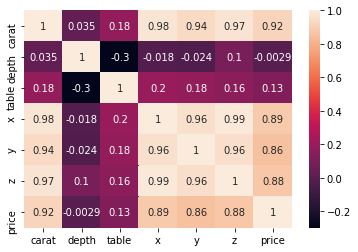

In [18]:
sns.heatmap(df.corr(),annot=True)
#plt.gcf().set_size_inches(29, 15)
plt.show()

### Covariance Plot

In [19]:
df.cov()

,carat,depth,table,x,y,z,price
carat,0.227234,0.023724,0.193142,0.524457,0.522418,0.322961,1.766983e+03
depth,0.023724,1.994429,-0.938126,-0.029269,-0.040241,0.100607,-1.643333e+01
table,0.193142,-0.938126,4.976762,0.493004,0.473597,0.242349,1.134274e+03
x,0.524457,-0.029269,0.493004,1.268623,1.262139,0.775630,4.012868e+03
y,0.522418,-0.040241,0.473597,1.262139,1.357885,0.778515,4.006714e+03
z,0.322961,0.100607,0.242349,0.775630,0.778515,0.488054,2.461363e+03
price,1766.982933,-16.433328,1134.274301,4012.867531,4006.714435,2461.363227,1.615887e+07


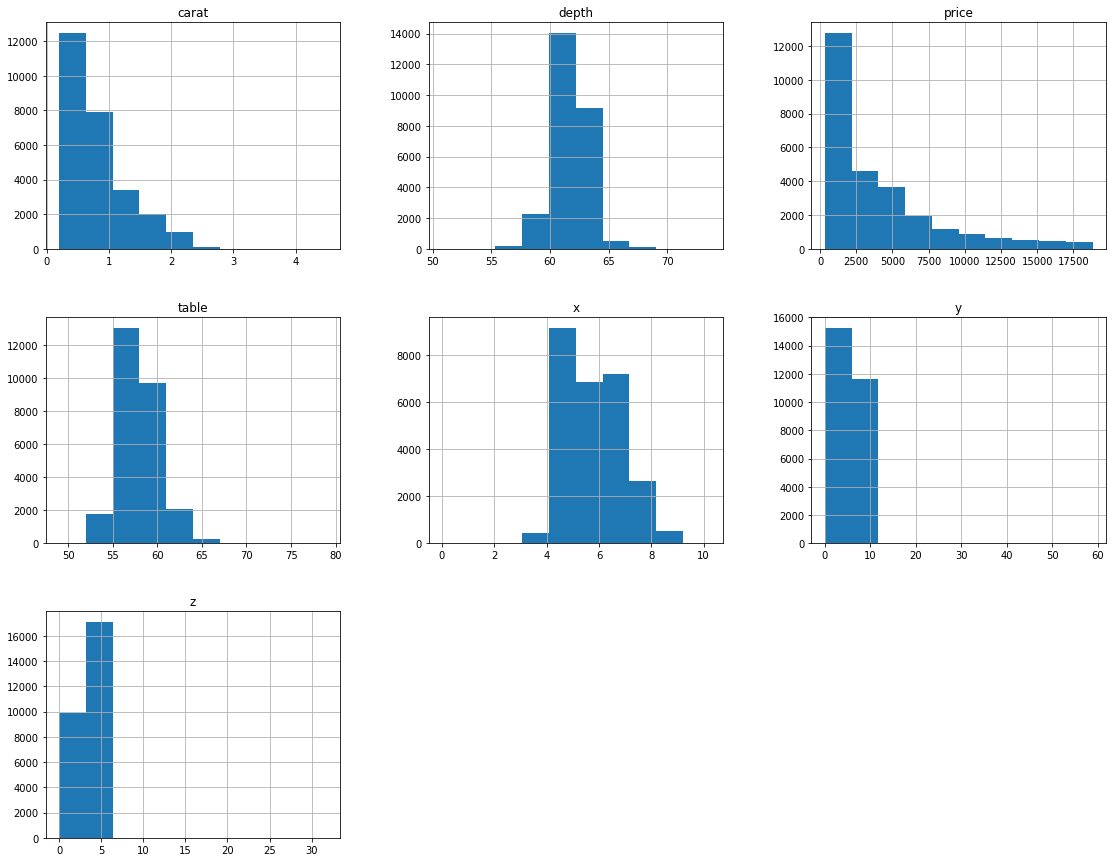

In [48]:
df.hist(figsize=(19,15));

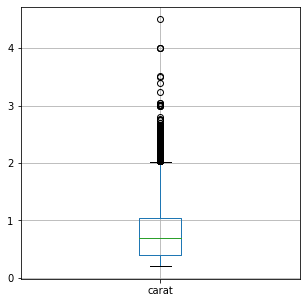

In [49]:
df.boxplot(column="carat",return_type='axes',figsize=(5,5));

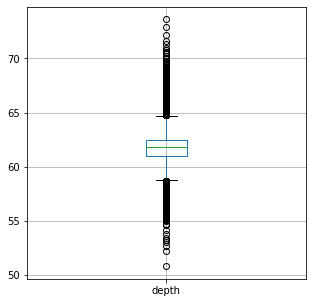

In [50]:
df.boxplot(column="depth",return_type='axes',figsize=(5,5));

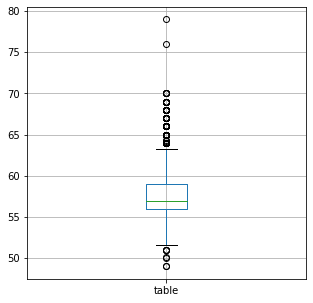

In [51]:
df.boxplot(column="table",return_type='axes',figsize=(5,5));

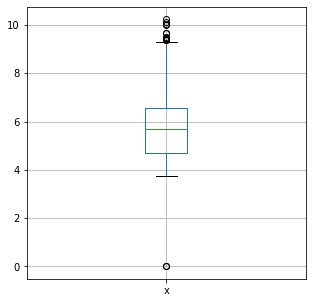

In [52]:
df.boxplot(column="x",return_type='axes',figsize=(5,5));

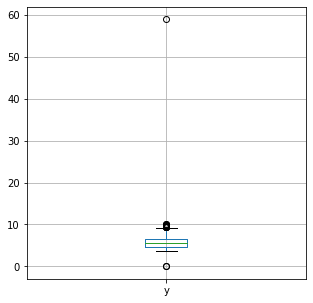

In [53]:
df.boxplot(column="y",return_type='axes',figsize=(5,5));

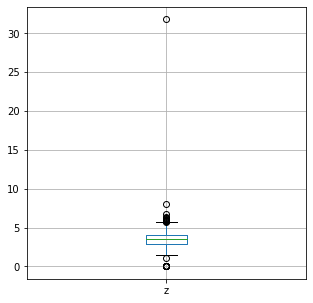

In [54]:
df.boxplot(column="z",return_type='axes',figsize=(5,5));

### Bivariate Analysis

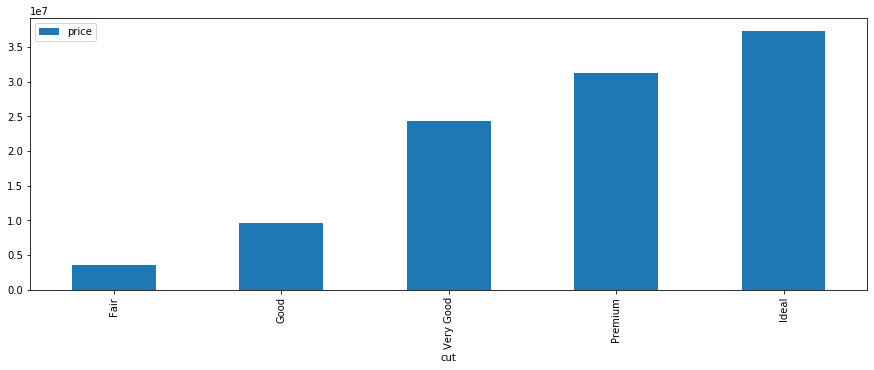

In [55]:
df.groupby(by=['cut'])['price'].sum().reset_index().sort_values(['price']).tail(10).plot(x='cut', y='price', kind='bar',figsize=(15,5))
plt.show()

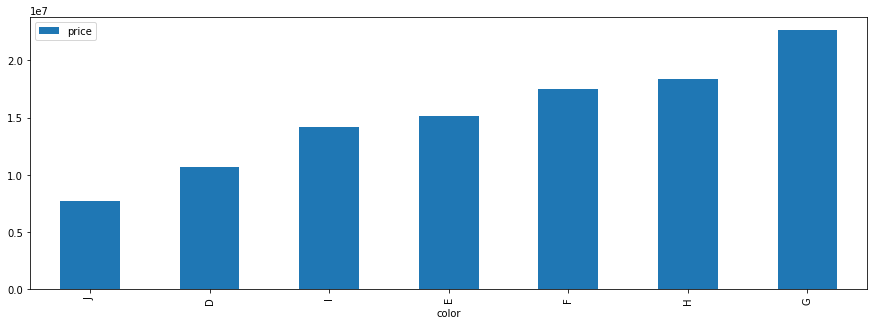

In [56]:
df.groupby(by=['color'])['price'].sum().reset_index().sort_values(['price']).tail(10).plot(x='color', y='price', kind='bar',figsize=(15,5))
plt.show()

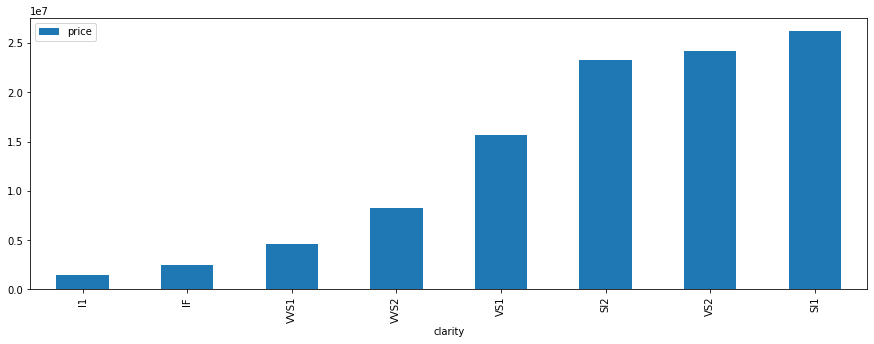

In [57]:
df.groupby(by=['clarity'])['price'].sum().reset_index().sort_values(['price']).tail(10).plot(x='clarity', y='price', kind='bar',figsize=(15,5))
plt.show()

In [58]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

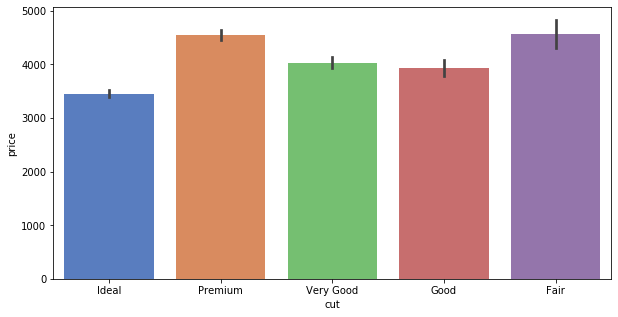

In [59]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='cut', y='price', data=df, palette='muted')  # barplot

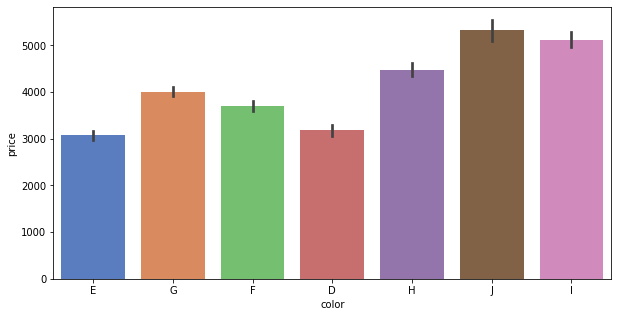

In [60]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='color', y='price', data=df, palette='muted')  # barplot

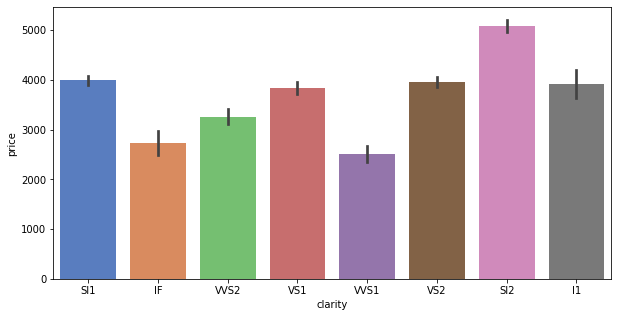

In [61]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='clarity', y='price', data=df, palette='muted')  # barplot

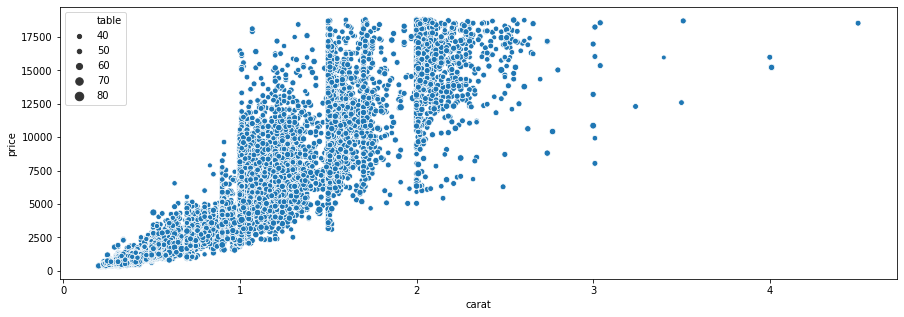

In [62]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['carat'],y='price', data=df, size = "table") # scatter plot

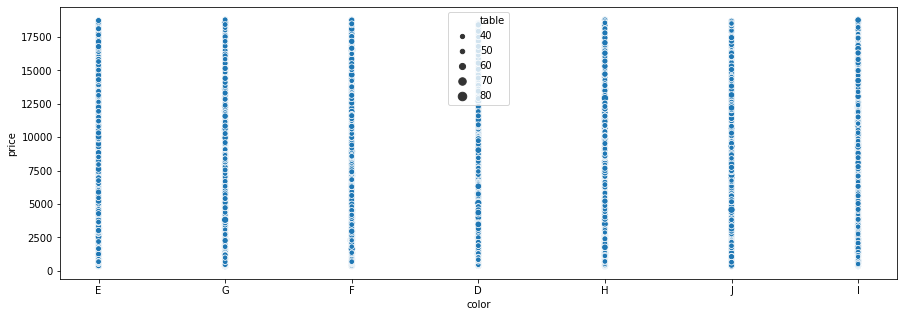

In [63]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['color'],y='price', data=df, size = "table") # scatter plot

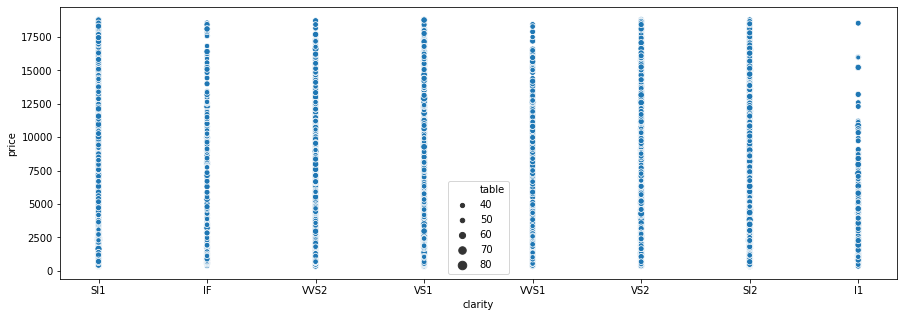

In [64]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['clarity'],y='price', data=df, size = "table") # scatter plot

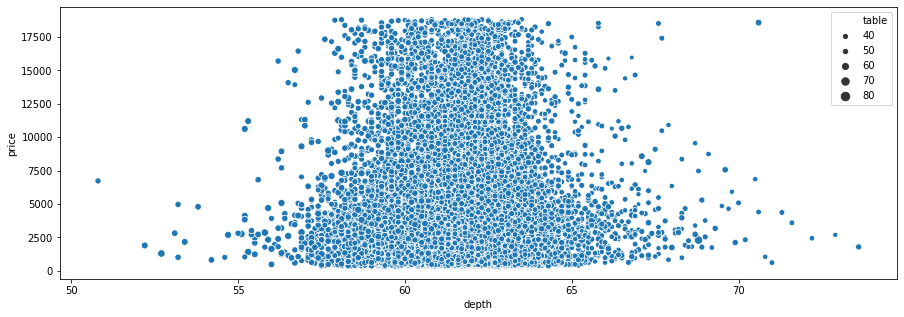

In [65]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['depth'],y='price', data=df, size = "table") # scatter plot

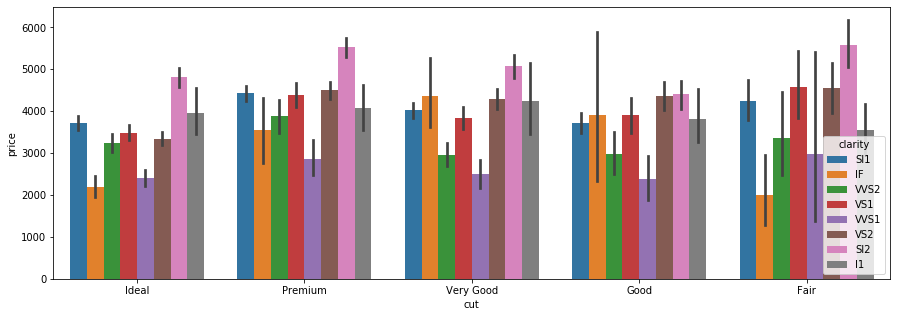

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='cut',y='price',hue='clarity')
plt.show()

In [67]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

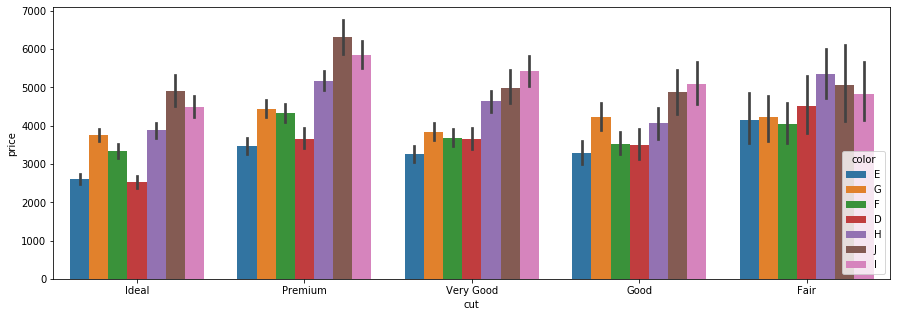

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='cut',y='price',hue='color')
plt.show()

### Outlier Checks

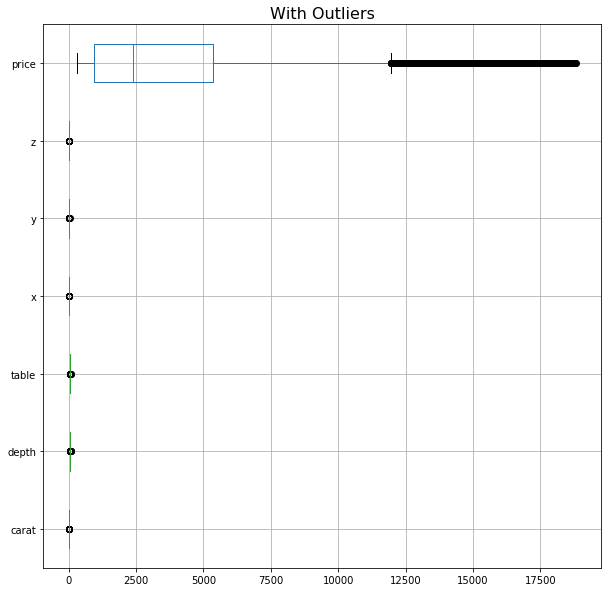

In [121]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

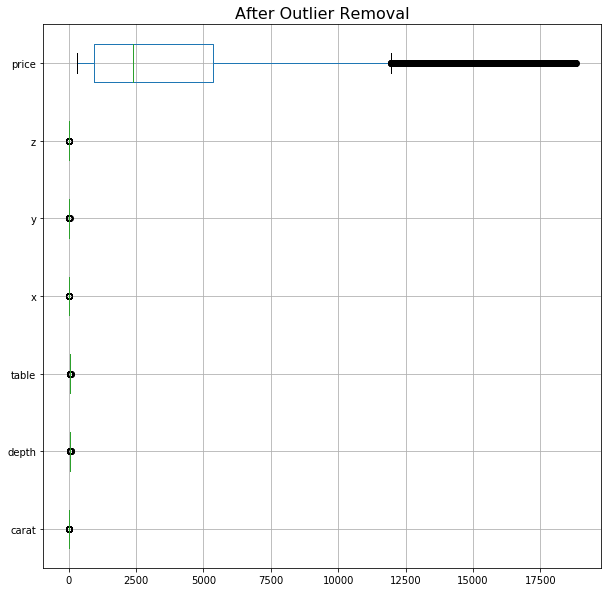

In [25]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

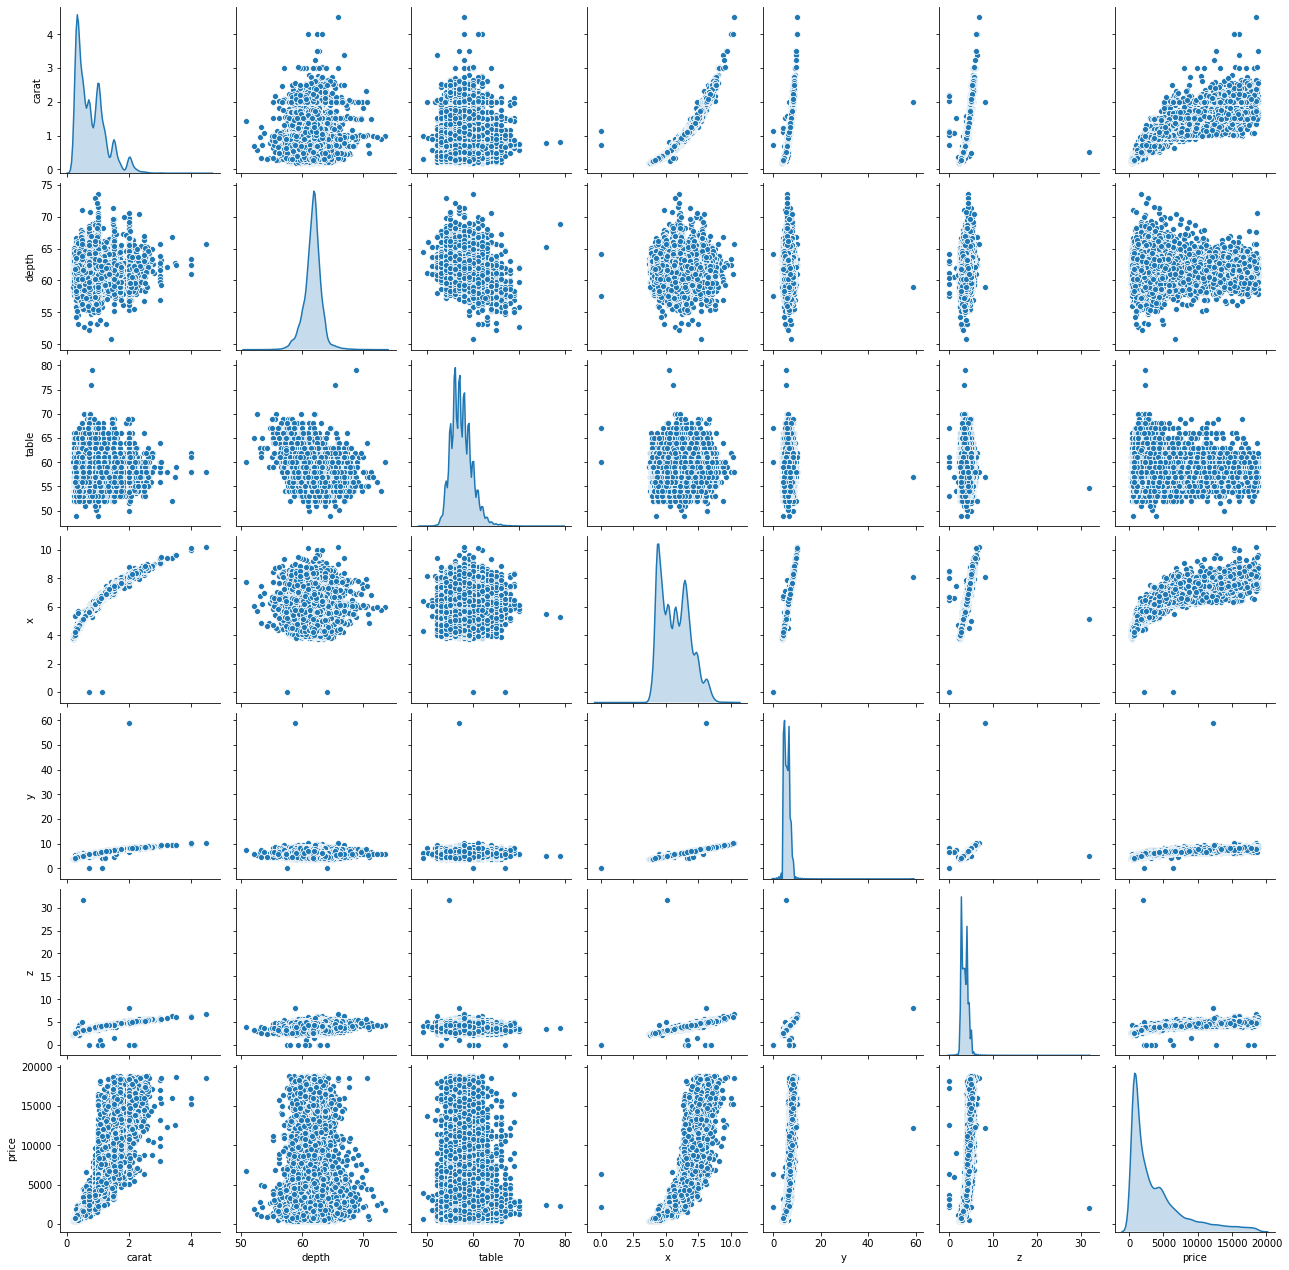

In [28]:
#df_attr = (df[cont])
sns.pairplot(df, diag_kind='kde')  
plt.show()

#### 2.	Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [18]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [19]:
# Check for 'zero' value in any column
df[(df.carat == 0) | (df.cut == 0) | (df.color == 0) | (df.clarity == 0) | (df.depth == 0) | (df.table == 0) | (df.x == 0)| (df.y == 0)| (df.z == 0)| (df.price == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [20]:
df[(df.carat == 0) | (df.cut == 0) | (df.color == 0) | (df.clarity == 0) | (df.depth == 0) | (df.table == 0) | (df.x == 0)| (df.y == 0)| (df.z == 0)| (df.price == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [21]:
# Hieght=0 not possible so those records should be drop
# df[(df.carat == 0) | (df.cut == 0) | (df.color == 0) | (df.clarity == 0) | (df.depth == 0) | (df.table == 0) | (df.x == 0) | (df.y == 0) | (df.z == 0) | (df.price == 0)], axis=1)

In [22]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [24]:
df['carat'] = std_scale.fit_transform(df[['carat']])
df['depth'] = std_scale.fit_transform(df[['depth']])
df['table'] = std_scale.fit_transform(df[['table']])
df['x'] = std_scale.fit_transform(df[['x']])
df['y'] = std_scale.fit_transform(df[['y']])
df['z'] = std_scale.fit_transform(df[['z']])
df['price'] = std_scale.fit_transform(df[['price']])
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043924,Ideal,E,SI1,0.251176,0.243911,-1.295066,-1.237909,-1.254430,-0.855014
1,-0.980989,Premium,G,IF,-0.669363,0.243911,-1.161887,-1.092019,-1.197172,-0.734359
2,0.214777,Very Good,E,VVS2,0.321987,1.140441,0.276437,0.332555,0.348788,0.585381
3,-0.792184,Ideal,F,VS1,-0.102877,-0.652619,-0.806745,-0.800239,-0.824997,-0.709979
4,-1.022946,Ideal,F,VVS1,-0.952606,0.692176,-1.224037,-1.117764,-1.268744,-0.785357
...,...,...,...,...,...,...,...,...,...,...
26962,0.655322,Premium,G,SI1,0.392798,0.243911,0.782515,0.675825,0.792535,0.366212
26963,-0.980989,Ideal,H,IF,0.109555,-1.100884,-1.144130,-1.126346,-1.139914,-0.702019
26964,-0.603379,Premium,E,VS2,-0.032067,0.243911,-0.540389,-0.499877,-0.524393,-0.567184
26965,-1.106859,Very Good,F,VVS2,0.038744,-0.652619,-1.366094,-1.315145,-1.340316,-0.809488


## 3.	Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [59]:
df

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043924,0.251176,0.243911,-1.295066,-1.237909,-1.254430,-0.855014,-0.172251,-0.315564,1.220805,...,-0.336599,-0.237244,-0.116951,-0.185307,1.760140,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958
1,-0.980989,-0.669363,0.243911,-1.161887,-1.092019,-1.197172,-0.734359,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,5.396452,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958
2,0.214777,0.321987,1.140441,0.276437,0.332555,0.348788,0.585381,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,3.096380
3,-0.792184,-0.102877,-0.652619,-0.806745,-0.800239,-0.824997,-0.709979,-0.172251,-0.315564,1.220805,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,2.362983,-0.539752,-0.270678,-0.322958
4,-1.022946,-0.952606,0.692176,-1.224037,-1.117764,-1.268744,-0.785357,-0.172251,-0.315564,1.220805,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,3.694428,-0.322958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.655322,0.392798,0.243911,0.782515,0.675825,0.792535,0.366212,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,-0.185307,1.760140,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958
26963,-0.980989,0.109555,-1.100884,-1.144130,-1.126346,-1.139914,-0.702019,-0.172251,-0.315564,1.220805,...,-0.336599,-0.237244,-0.116951,5.396452,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958
26964,-0.603379,-0.032067,0.243911,-0.540389,-0.499877,-0.524393,-0.567184,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,1.852702,-0.270678,-0.322958
26965,-1.106859,0.038744,-0.652619,-1.366094,-1.315145,-1.340316,-0.809488,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,3.096380


In [25]:
df = pd.get_dummies(df)

In [31]:
df = df.rename(columns={'cut_Very Good':'cut_Very_Good'})

0        0
1        0
2        1
3        0
4        0
        ..
26962    0
26963    0
26964    0
26965    1
26966    0
Name: cut_Very_Good, Length: 26236, dtype: uint8

In [33]:
df['cut_Ideal'] = std_scale.fit_transform(df[['cut_Ideal']])
df['cut_Premium'] = std_scale.fit_transform(df[['cut_Premium']])
df['cut_Very_Good'] = std_scale.fit_transform(df[['cut_Very_Good']])
df['cut_Good'] = std_scale.fit_transform(df[['cut_Good']])
df['cut_Fair'] = std_scale.fit_transform(df[['cut_Fair']])


df['color_E'] = std_scale.fit_transform(df[['color_E']])
df['color_G'] = std_scale.fit_transform(df[['color_G']])
df['color_F'] = std_scale.fit_transform(df[['color_F']])
df['color_D'] = std_scale.fit_transform(df[['color_D']])
df['color_H'] = std_scale.fit_transform(df[['color_H']])
df['color_J'] = std_scale.fit_transform(df[['color_J']])
df['color_I'] = std_scale.fit_transform(df[['color_I']])

df['clarity_SI1'] = std_scale.fit_transform(df[['clarity_SI1']])
df['clarity_IF'] = std_scale.fit_transform(df[['clarity_IF']])
df['clarity_VVS2'] = std_scale.fit_transform(df[['clarity_VVS2']])
df['clarity_VS1'] = std_scale.fit_transform(df[['clarity_VS1']])
df['clarity_VVS1'] = std_scale.fit_transform(df[['clarity_VVS1']])
df['clarity_VS2'] = std_scale.fit_transform(df[['clarity_VS2']])
df['clarity_SI2'] = std_scale.fit_transform(df[['clarity_SI2']])
df['clarity_I1'] = std_scale.fit_transform(df[['clarity_I1']])

df

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043924,0.251176,0.243911,-1.295066,-1.237909,-1.254430,-0.855014,-0.172251,-0.315564,1.220805,...,-0.336599,-0.237244,-0.116951,-0.185307,1.760140,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958
1,-0.980989,-0.669363,0.243911,-1.161887,-1.092019,-1.197172,-0.734359,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,5.396452,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958
2,0.214777,0.321987,1.140441,0.276437,0.332555,0.348788,0.585381,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,3.096380
3,-0.792184,-0.102877,-0.652619,-0.806745,-0.800239,-0.824997,-0.709979,-0.172251,-0.315564,1.220805,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,2.362983,-0.539752,-0.270678,-0.322958
4,-1.022946,-0.952606,0.692176,-1.224037,-1.117764,-1.268744,-0.785357,-0.172251,-0.315564,1.220805,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,3.694428,-0.322958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.655322,0.392798,0.243911,0.782515,0.675825,0.792535,0.366212,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,-0.185307,1.760140,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958
26963,-0.980989,0.109555,-1.100884,-1.144130,-1.126346,-1.139914,-0.702019,-0.172251,-0.315564,1.220805,...,-0.336599,-0.237244,-0.116951,5.396452,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958
26964,-0.603379,-0.032067,0.243911,-0.540389,-0.499877,-0.524393,-0.567184,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,1.852702,-0.270678,-0.322958
26965,-1.106859,0.038744,-0.652619,-1.366094,-1.315145,-1.340316,-0.809488,-0.172251,-0.315564,-0.819131,...,-0.336599,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,3.096380


In [93]:
#encode_column = {
#    "cut":     {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5},
#    "color":   {"J": 1, "D": 2, "I": 3, "E": 4, "F": 5, "H": 6, "G":7 },
#    "clarity": {"I1": 1, "IF": 2, "VVS1": 3, "VVS2": 4, "VS1": 5, "SI2": 6, "VS2": 7, "SI1": 8}
#}

### Train-Test Split

In [35]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [37]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model

In [38]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.3749974577742952
The coefficient for depth is -0.020408846095560332
The coefficient for table is -0.018005584810348148
The coefficient for x is -0.28013994376435414
The coefficient for y is 0.004252577335739656
The coefficient for z is -0.049350732315418484
The coefficient for cut_Fair is -0.028630981085266512
The coefficient for cut_Good is -0.009518123854948025
The coefficient for cut_Ideal is 0.013012311626249414
The coefficient for cut_Premium is 0.0022911052675370614
The coefficient for cut_Very_Good is 0.0003444564255112713
The coefficient for color_D is 0.051535242559606544
The coefficient for color_E is 0.04243252377208756
The coefficient for color_F is 0.03461102425533179
The coefficient for color_G is 0.01804237539239895
The coefficient for color_H is -0.03327478022152353
The coefficient for color_I is -0.0662699470239553
The coefficient for color_J is -0.09773053406908952
The coefficient for clarity_I1 is -0.11445250254437181
The coefficient fo

In [40]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.0005766918573668475


In [41]:
# R square on training data
regression_model.score(X_train, y_train)

0.9228576930057464

92.28% of the variation in the log_price is explained by the predictors in the model for train set

In [42]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9160202821304018

In [43]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.28008310704406436

In [44]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2839588980893737

### Linear Regression using statsmodels

In [45]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
23846,-0.939032,-1.165038,2.036971,-1.073102,-0.997619,-1.154229,-0.172251,-0.315564,-0.819131,-0.585273,...,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,3.694428,-0.322958,-0.793816
6397,-0.813162,0.534419,0.243911,-0.868895,-0.868893,-0.824997,-0.172251,-0.315564,-0.819131,1.708605,...,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,-0.270678,3.096380,-0.641816
478,0.256734,0.321987,-1.100884,0.409616,0.452699,0.477618,-0.172251,-0.315564,-0.819131,-0.585273,...,-0.237244,-0.116951,-0.185307,1.760140,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958,0.170428
22277,-0.183812,-2.368820,2.081798,0.063352,0.083683,-0.195161,-0.172251,3.168925,-0.819131,-0.585273,...,-0.237244,-0.116951,-0.185307,1.760140,-0.451094,-0.423194,-0.539752,-0.270678,-0.322958,-0.411452
21314,0.676301,-2.014767,1.140441,0.933450,1.010514,0.706649,-0.172251,-0.315564,-0.819131,-0.585273,...,-0.237244,-0.116951,-0.185307,-0.568136,-0.451094,-0.423194,-0.539752,3.694428,-0.322958,1.028942


In [60]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [50]:
expr= 'price ~ carat + depth + table + x + y + z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [51]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       -0.000577
carat            1.374997
depth           -0.020409
table           -0.018006
x               -0.280140
y                0.004253
z               -0.049351
cut_Fair        -0.028631
cut_Good        -0.009518
cut_Ideal        0.013012
cut_Premium      0.002291
cut_Very_Good    0.000344
color_D          0.051535
color_E          0.042433
color_F          0.034611
color_G          0.018042
color_H         -0.033275
color_I         -0.066270
color_J         -0.097731
clarity_I1      -0.114453
clarity_IF       0.055806
clarity_SI1     -0.036272
clarity_SI2     -0.125130
clarity_VS1      0.049934
clarity_VS2      0.028280
clarity_VVS1     0.062855
clarity_VVS2     0.068704
dtype: float64

In [52]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     9540.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:15:05   Log-Likelihood:                -2686.2
No. Observations:               18365   AIC:                             5420.
Df Residuals:                   18341   BIC:                             5608.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0006      0.002     -0.279

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [53]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [54]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2800831070440645

In [55]:
np.sqrt(lm1.mse_resid) #another way

0.2802662976280215

In [56]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

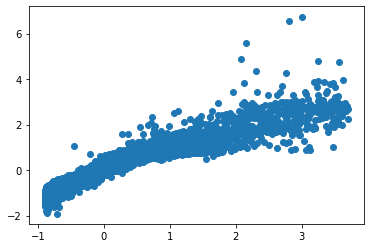

In [57]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [61]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.37) * carat + (-0.02) * depth + (-0.02) * table + (-0.28) * x + (0.0) * y + (-0.05) * z + (-0.03) * cut_Fair + (-0.01) * cut_Good + (0.01) * cut_Ideal + (0.0) * cut_Premium + (0.0) * cut_Very_Good + (0.05) * color_D + (0.04) * color_E + (0.03) * color_F + (0.02) * color_G + (-0.03) * color_H + (-0.07) * color_I + (-0.1) * color_J + (-0.11) * clarity_I1 + (0.06) * clarity_IF + (-0.04) * clarity_SI1 + (-0.13) * clarity_SI2 + (0.05) * clarity_VS1 + (0.03) * clarity_VS2 + (0.06) * clarity_VVS1 + (0.07) * clarity_VVS2 + 

 # Conclusion

The final Linear Regression equation is  
  
<b>price = (-0.0) * Intercept + (1.37) * carat + (-0.02) * depth + (-0.02) * table + (-0.28) * x + (0.0) * y + (-0.05) * z + (-0.03) * cut_Fair + (-0.01) * cut_Good + (0.01) * cut_Ideal + (0.0) * cut_Premium + (0.0) * cut_Very_Good + (0.05) * color_D + (0.04) * color_E + (0.03) * color_F + (0.02) * color_G + (-0.03) * color_H + (-0.07) * color_I + (-0.1) * color_J + (-0.11) * clarity_I1 + (0.06) * clarity_IF + (-0.04) * clarity_SI1 + (-0.13) * clarity_SI2 + (0.05) * clarity_VS1 + (0.03) * clarity_VS2 + (0.06) * clarity_VVS1 + (0.07) * clarity_VVS2</b>  
  
•	When carat increases by 1 unit, price increases by 1.37 units, keeping all other predictors constant.

•	similarly, when clarity_VVS1 increases by 1 unit, price increases by 0.07 units, keeping all other predictors constant.

•	There are also some negative co-efficient values, for instance, depth has its corresponding co-efficient as -0.0204. This implies, when the depth decrease by 1 unit, the price decreases by -0.0204 units, keeping all other predictors constant


